In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/Telecom_customer churn.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (100000, 100)


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


C:\Users\panch\AppData\Local\Temp\ipykernel_2160\700187256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='viridis')


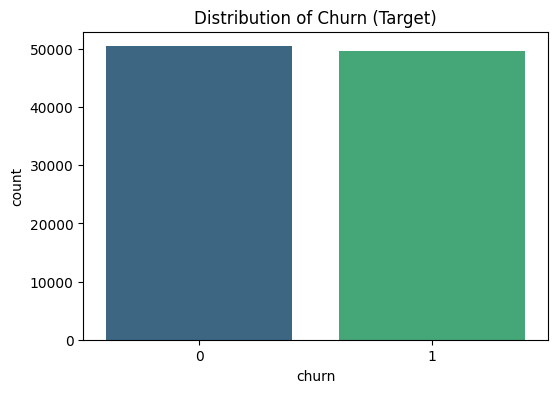

In [2]:
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df, palette='viridis')
plt.title('Distribution of Churn (Target)')
plt.show()
# Note: Mention the % of churners vs non-churners.

Text(0.5, 1.0, 'Correlation of Key Behavioral Features with Churn')

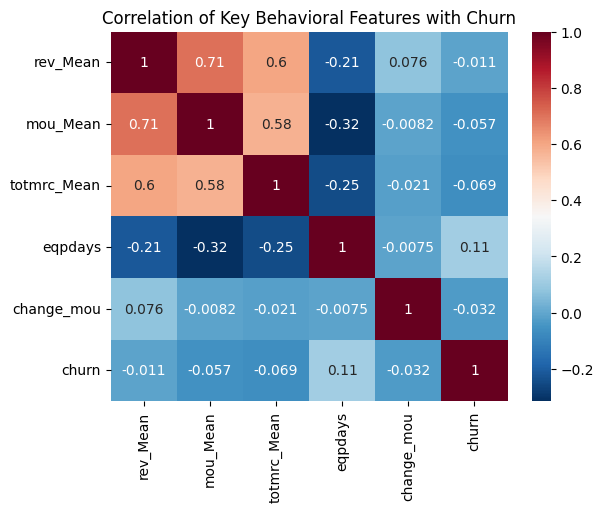

In [3]:
# Select a subset of the 28 features to show correlation
cols_to_plot = ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'eqpdays', 'change_mou', 'churn']
sns.heatmap(df[cols_to_plot].corr(), annot=True, cmap='RdBu_r')
plt.title('Correlation of Key Behavioral Features with Churn')

Text(0.5, 1.0, 'Skewness in Roaming Minutes (Roam_Mean)')

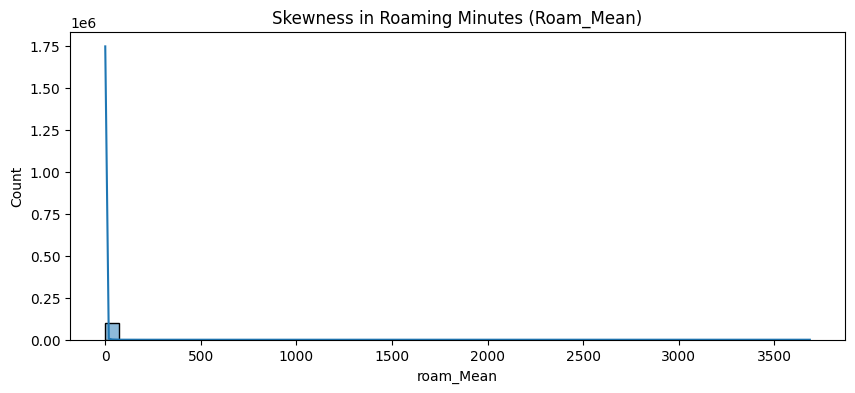

In [4]:
plt.figure(figsize=(10,4))
sns.histplot(df['roam_Mean'], bins=50, kde=True)
plt.title('Skewness in Roaming Minutes (Roam_Mean)')
# Discussion: Point out that standard scaling fails here, 
# hence the use of QuantileTransformer in the pipeline.

C:\Users\panch\AppData\Local\Temp\ipykernel_2160\2972226956.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['churn'] == 1]['eqpdays'], label='Churn', shade=True)
C:\Users\panch\AppData\Local\Temp\ipykernel_2160\2972226956.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['churn'] == 0]['eqpdays'], label='No Churn', shade=True)


Text(0.5, 1.0, 'Influence of Equipment Age (Days) on Churn')

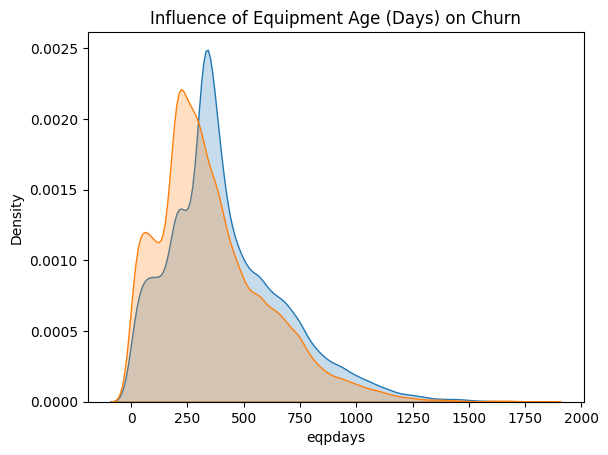

In [5]:
sns.kdeplot(df[df['churn'] == 1]['eqpdays'], label='Churn', shade=True)
sns.kdeplot(df[df['churn'] == 0]['eqpdays'], label='No Churn', shade=True)
plt.title('Influence of Equipment Age (Days) on Churn')

Text(0.5, 1.0, 'Drop in Minutes of Use (MOU) as a Churn Indicator')

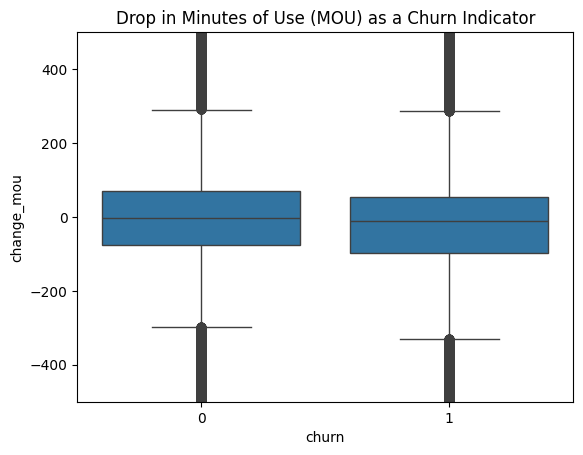

In [6]:
sns.boxplot(x='churn', y='change_mou', data=df)
plt.ylim(-500, 500) # Zoom in to see the bulk of data
plt.title('Drop in Minutes of Use (MOU) as a Churn Indicator')